# High-energy LB phase transitions

In [1]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from itertools import product as prod
from __class_PhononConfig import TwistedRealspacePhonon
from pymatgen.io.vasp.inputs import Poscar
%matplotlib inline

In [2]:
ROOT = '/Users/jonathanlu/Documents'
DIRNAME = "tvMoS2"
THSPC_DIR = "theta"

In [3]:
# Change as necessary
th_min, th_max, ntheta = np.loadtxt(f"{ROOT}/{DIRNAME}/theta.txt")
ntheta = int(ntheta)
KPT = 'Gamma'
print(f"{ntheta} angles from {th_min} to {th_max}")

101 angles from 0.01 to 10.0


In [4]:
# Import dataset from the directory
log_name = r'$\Gamma$' if KPT == 'Gamma' else KPT
path = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_modes.npy'
poscars_uc = [Poscar.from_file(f'{ROOT}/{DIRNAME}/POSCAR_LAYER{i+1}') for i in range(2)]
dataset = np.load(path)
nmodes = dataset.shape[1]
print("Dataset shape:", dataset.shape)
print("Number of modes:", nmodes)
thetas = np.linspace(th_min, th_max, ntheta)

Dataset shape: (101, 35)
Number of modes: 35


In [5]:
# Find indices of LB modes, manually
LB2_idxs = np.zeros(ntheta).astype(int)
LB2_idxs[73:] = 23
LB2_idxs[:73] = 23

LB3_idxs = np.zeros(ntheta).astype(int)
LB3_idxs[73:] = 27
LB3_idxs[:73] = 29

np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB2_idxs.npy', LB2_idxs)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB3_idxs.npy', LB3_idxs)

In [6]:
# Extract the mode list from the indices
LB2_modes = np.zeros(ntheta)
LB3_modes = np.zeros(ntheta)

for i in range(ntheta):
    LB2_modes[i] = dataset[i, LB2_idxs[i]]
    LB3_modes[i] = dataset[i, LB3_idxs[i]]
    
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB2_modes.npy', LB2_modes)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB3_modes.npy', LB3_modes)

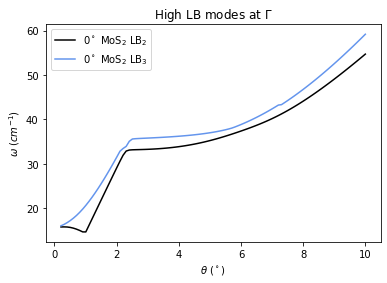

In [7]:
# Plot LB modes
plt.plot(thetas[2:], LB2_modes[2:], c='k', label=r'$0^\circ$ MoS$_2$ LB$_2$')
plt.plot(thetas[2:], LB3_modes[2:], c='cornflowerblue', label=r'$0^\circ$ MoS$_2$ LB$_3$')
plt.title(f"High LB modes at " + log_name)
plt.xlabel(r'$\theta$ ($^\circ$)')
plt.ylabel(r'$\omega$ $(cm^{-1})$')
plt.legend()

# plt.savefig("/Users/jonathanlu/Documents/tvMoS2/theta/data/transition.pdf")
plt.show()